In [1]:
import pandas
print('Pandas',pandas.__version__)

Pandas 0.24.2


In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [9]:

%cd My Drive

/content/drive/My Drive


In [10]:
cd Python Workshop

/content/drive/My Drive/Python Workshop


In [0]:
df = pandas.read_csv('./files/csv_files/sample_dataset.csv')

In [0]:
# If you get an error message simply because the CSV file was large
# try reading that csv with the following command
df = pandas.read_csv('./files/csv_files/sample_dataset.csv', low_memory=False)

In [14]:
# dimensions of the dataset
df.shape

(18, 17)

In [15]:
# let's look at the first rows 
df.head(4)

,This data set is created from other datasets by selecting some random columns.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Date,Time,FirstName,LastName,Sex,Favourite Artist,NaN,Fav. Park Location,Home Address (Street),Region,"""City""","""State""","""Age""","""Weight""","""BMI""",Complete,Type
1,10/5/13,7:30 AM,John,Doe,M,"""Jack Nicholson""",NaN,"(40.9099922695, -73.2632063245)",3526 HIGH ST,9,"""Youngstown""",OH,60,59,22.02,85.50%,1
2,10/9/13,8:00 AM,Jack,McGinnis,M,"""Roberto Benigni""",NaN,"(40.9099922695, -73.2632063245)",51 OMAHA CT,9,"""Yankton""",SD,12,86,19.7,85.50%,1
3,12/5/13,8:30 AM,"John ""Da Man""",Repici,M,"""Kevin Spacey""",NaN,"(40.9099922695, -73.2632063245)",2796 BRANCH ST,9,"""Yakima""",WA,41,69,24.09,73%,1


In [0]:
# the first line is a comment. we need to skip data row.
df = pandas.read_csv('./files/csv_files/sample_dataset.csv', skiprows=1, low_memory=False)

In [18]:
df.shape

(17, 17)

In [19]:
df.head(4)

,Date,Time,FirstName,LastName,Sex,Favourite Artist,Unnamed: 6,Fav. Park Location,Home Address (Street),Region,"""City""","""State""","""Age""","""Weight""","""BMI""",Complete,Type
0,10/5/13,7:30 AM,John,Doe,M,"""Jack Nicholson""",NaN,"(40.9099922695, -73.2632063245)",3526 HIGH ST,9.0,"""Youngstown""",OH,60.0,59.0,22.02,85.50%,1.0
1,10/9/13,8:00 AM,Jack,McGinnis,M,"""Roberto Benigni""",NaN,"(40.9099922695, -73.2632063245)",51 OMAHA CT,9.0,"""Yankton""",SD,12.0,86.0,19.70,85.50%,1.0
2,12/5/13,8:30 AM,"John ""Da Man""",Repici,M,"""Kevin Spacey""",NaN,"(40.9099922695, -73.2632063245)",2796 BRANCH ST,9.0,"""Yakima""",WA,41.0,69.0,24.09,73%,1.0
3,1/2/14,9:00 AM,Stephen,Tyler,M,"""Russell Crowe""",NaN,"(43.3616709338, -76.4360441829)",2805 JANETTE WAY,5.0,"""Worcester""",MA,22.0,88.0,26.97,27%,1.0


In [20]:
# let's learn the data-types
df.dtypes

Date                      object
Time                      object
FirstName                 object
LastName                  object
Sex                       object
Favourite Artist          object
Unnamed: 6               float64
Fav. Park Location        object
Home Address (Street)     object
Region                   float64
"City"                    object
"State"                   object
"Age"                    float64
"Weight"                 float64
"BMI"                    float64
Complete                  object
Type                     float64
dtype: object

In [0]:
# for large datasets, dtypes command allow you to see limited number of data-types. in order to prevent this
pandas.set_option("display.max_rows", 999)
pandas.set_option("display.max_columns", 999)
df.dtypes

In [21]:
df.info

<bound method DataFrame.info of         Date      Time              FirstName  ...  "BMI" Complete Type
0    10/5/13   7:30 AM                   John  ...  22.02   85.50%  1.0
1    10/9/13   8:00 AM                   Jack  ...  19.70   85.50%  1.0
2    12/5/13   8:30 AM          John "Da Man"  ...  24.09      73%  1.0
3     1/2/14   9:00 AM                Stephen  ...  26.97      27%  1.0
4     6/5/14   9:30 AM                    NaN  ...  21.51   78.30%  1.0
5    9/12/14  10:00 AM  Joan "the bone", Anne  ...  18.69   25.60%  1.0
6    10/5/14  10:30 AM                  Maria  ...  24.24   85.50%  1.0
7    10/5/14  11:00 AM                  Susan  ...  21.23   85.50%  1.0
8     1/1/16  11:30 AM                  Robin  ...  30.26      73%  1.0
9    10/5/16  12:00 PM                    NaN  ...  21.88      27%  1.0
10   10/5/16  12:30 PM                Whitney  ...  17.63   78.30%  1.0
11   10/5/17   1:00 PM                    Bob  ...  24.57   25.60%  1.0
12  10/15/17   1:30 PM          

In [22]:
df.describe()

,Unnamed: 6,Region,"""Age""","""Weight""","""BMI""",Type
count,0.0,14.000000,15.00000,15.000000,15.000000,15.0
mean,NaN,6.500000,23.60000,64.200000,22.782667,1.0
std,NaN,2.766559,17.34441,11.409269,3.451860,0.0
min,NaN,1.000000,2.00000,47.000000,17.630000,1.0
25%,NaN,4.250000,12.50000,55.500000,20.825000,1.0
50%,NaN,7.000000,18.00000,64.000000,21.880000,1.0
75%,NaN,9.000000,35.50000,68.500000,24.405000,1.0
max,NaN,9.000000,60.00000,88.000000,30.260000,1.0


In [23]:
#By default, describe() applies to numeric columns. To expand to other types,
df.describe(include='all')

,Date,Time,FirstName,LastName,Sex,Favourite Artist,Unnamed: 6,Fav. Park Location,Home Address (Street),Region,"""City""","""State""","""Age""","""Weight""","""BMI""",Complete,Type
count,15,15,13,14,15,15,0.0,15,14,14.000000,15,15,15.00000,15.000000,15.000000,15,15.0
unique,13,15,12,14,2,14,NaN,9,14,NaN,14,14,NaN,NaN,NaN,6,NaN
top,10/5/16,11:30 AM,Susan,Jackson,F,"""Sean Penn""",NaN,"(40.7475174105, -73.4568035403)",645 MORRISON AVE,NaN,"""Wilmington""",NC,NaN,NaN,NaN,85.50%,NaN
freq,2,1,2,1,8,2,NaN,5,1,NaN,2,2,NaN,NaN,NaN,4,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.500000,NaN,NaN,23.60000,64.200000,22.782667,NaN,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.766559,NaN,NaN,17.34441,11.409269,3.451860,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.00000,47.000000,17.630000,NaN,1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.250000,NaN,NaN,12.50000,55.500000,20.825000,NaN,1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,18.00000,64.000000,21.880000,NaN,1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,35.50000,68.500000,24.405000,NaN,1.0


In [24]:
#the result might be messy (since describe outputs different results for numberical versus object). Let's try
df.describe(include='object')

,Date,Time,FirstName,LastName,Sex,Favourite Artist,Fav. Park Location,Home Address (Street),"""City""","""State""",Complete
count,15,15,13,14,15,15,15,14,15,15,15
unique,13,15,12,14,2,14,9,14,14,14,6
top,10/5/16,11:30 AM,Susan,Jackson,F,"""Sean Penn""","(40.7475174105, -73.4568035403)",645 MORRISON AVE,"""Wilmington""",NC,85.50%
freq,2,1,2,1,8,2,5,1,2,2,4


In [25]:
df['Date'][0:4]

0    10/5/13
1    10/9/13
2    12/5/13
3     1/2/14
Name: Date, dtype: object

In [26]:
# see the difference between previous and this referencing!
df['"State"'][0:4]

0     OH
1     SD
2     WA
3     MA
Name: "State", dtype: object

In [27]:
# how many different states are there
df['"State"'].nunique()

14

In [28]:
# how many females, how many males
df['Sex'].value_counts()

F    8
M    7
Name: Sex, dtype: int64

In [29]:
# we'll receive an error message if we try
df['Complete'][0:8]

0    85.50%
1    85.50%
2       73%
3       27%
4    78.30%
5    25.60%
6    85.50%
7    85.50%
Name: Complete, dtype: object

In [30]:
# we'll receive another error message if we try
# df['Complete as percentege'] = df['Complete'].astype('float64')
#
# the reason is that % sign. let's ged rid off it


df['Complete as percentege'] = df['Complete'].str.replace('%','').astype('float64')
df.head(3)

,Date,Time,FirstName,LastName,Sex,Favourite Artist,Unnamed: 6,Fav. Park Location,Home Address (Street),Region,"""City""","""State""","""Age""","""Weight""","""BMI""",Complete,Type,Complete as percentege
0,10/5/13,7:30 AM,John,Doe,M,"""Jack Nicholson""",NaN,"(40.9099922695, -73.2632063245)",3526 HIGH ST,9.0,"""Youngstown""",OH,60.0,59.0,22.02,85.50%,1.0,85.5
1,10/9/13,8:00 AM,Jack,McGinnis,M,"""Roberto Benigni""",NaN,"(40.9099922695, -73.2632063245)",51 OMAHA CT,9.0,"""Yankton""",SD,12.0,86.0,19.70,85.50%,1.0,85.5
2,12/5/13,8:30 AM,"John ""Da Man""",Repici,M,"""Kevin Spacey""",NaN,"(40.9099922695, -73.2632063245)",2796 BRANCH ST,9.0,"""Yakima""",WA,41.0,69.0,24.09,73%,1.0,73.0


In [0]:
series_of_type_per_column = df.dtypes

In [32]:
df.head() # now we have a new column!

,Date,Time,FirstName,LastName,Sex,Favourite Artist,Unnamed: 6,Fav. Park Location,Home Address (Street),Region,"""City""","""State""","""Age""","""Weight""","""BMI""",Complete,Type,Complete as percentege
0,10/5/13,7:30 AM,John,Doe,M,"""Jack Nicholson""",NaN,"(40.9099922695, -73.2632063245)",3526 HIGH ST,9.0,"""Youngstown""",OH,60.0,59.0,22.02,85.50%,1.0,85.5
1,10/9/13,8:00 AM,Jack,McGinnis,M,"""Roberto Benigni""",NaN,"(40.9099922695, -73.2632063245)",51 OMAHA CT,9.0,"""Yankton""",SD,12.0,86.0,19.70,85.50%,1.0,85.5
2,12/5/13,8:30 AM,"John ""Da Man""",Repici,M,"""Kevin Spacey""",NaN,"(40.9099922695, -73.2632063245)",2796 BRANCH ST,9.0,"""Yakima""",WA,41.0,69.0,24.09,73%,1.0,73.0
3,1/2/14,9:00 AM,Stephen,Tyler,M,"""Russell Crowe""",NaN,"(43.3616709338, -76.4360441829)",2805 JANETTE WAY,5.0,"""Worcester""",MA,22.0,88.0,26.97,27%,1.0,27.0
4,6/5/14,9:30 AM,NaN,Blankman,F,"""Denzel Washington""",NaN,"(42.9657659397, -78.9531063633)",6001 MCMAHON DR,1.0,"""Arlington""",VA,5.0,64.0,21.51,78.30%,1.0,78.3


In [33]:
first_n_entries=5
for col,col_type in df.dtypes.iteritems():
    if(col_type=='object'):
        print('\n',col,'has',df[col].nunique(),'unique entries; first ',first_n_entries,'are')
        print(df[col][0:first_n_entries])


 Date has 13 unique entries; first  5 are
0    10/5/13
1    10/9/13
2    12/5/13
3     1/2/14
4     6/5/14
Name: Date, dtype: object

 Time has 15 unique entries; first  5 are
0    7:30 AM
1    8:00 AM
2    8:30 AM
3    9:00 AM
4    9:30 AM
Name: Time, dtype: object

 FirstName has 12 unique entries; first  5 are
0             John
1             Jack
2    John "Da Man"
3          Stephen
4              NaN
Name: FirstName, dtype: object

 LastName has 14 unique entries; first  5 are
0         Doe
1    McGinnis
2      Repici
3       Tyler
4    Blankman
Name: LastName, dtype: object

 Sex has 2 unique entries; first  5 are
0    M
1    M
2    M
3    M
4    F
Name: Sex, dtype: object

 Favourite Artist has 14 unique entries; first  5 are
0        "Jack Nicholson"
1       "Roberto Benigni"
2          "Kevin Spacey"
3         "Russell Crowe"
4     "Denzel Washington"
Name: Favourite Artist, dtype: object

 Fav. Park Location has 9 unique entries; first  5 are
0    (40.9099922695, -73.263206

In [0]:
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("\n==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

In [0]:
uniq_per_col(df,5)

In [0]:
df.head(6).T # let's see how the transpose of the dataset looks like

In [0]:
# are there columns that have no values?
df.isnull().head()

In [0]:
df.isnull().sum()

In [0]:
df.shape

In [0]:
# one of the columns is completely empty (probably we skipped that column accidentally)
df.isnull().sum()==df.shape[0]

In [0]:
# let's drop columns that are not useful
series_of_bool_indicating_whether_column_is_empty = df.isnull().sum()==df.shape[0]

for col_name, bool_value in series_of_bool_indicating_whether_column_is_empty.iteritems():
    if bool_value:
        df.drop([col_name],axis=1,inplace=True)

In [0]:
df.shape

In [0]:
len(df)

In [0]:
df.isnull().sum()/len(df)

In [0]:
df['FirstName'].isnull().sum()

In [0]:
# Strange! when we look at the CSV file, we only see two empty cells. What is going on? Let's investigate more.
df['Date'].isnull().sum()

In [0]:
# still strange. according csv file, the Date column is full!
# let's print the rows where the Date cell is null
df[df['Date'].isnull()]

In [0]:
# Now we know the problem: even though there is no entry, the last 2 rows was accepted as regular rows.
# The last two rows are actually empty! let's get rid off them
series_of_bool_indicating_whether_column_is_empty = df.T.isnull().sum()==df.T.shape[0]
for col_name, bool_value in series_of_bool_indicating_whether_column_is_empty.iteritems():
    if bool_value:
        df.drop([col_name],axis=0,inplace=True)

In [0]:
df.shape

In [0]:
df['FirstName'].isnull().sum()

In [0]:
df.head()

In [0]:
df.tail(3)

In [0]:
#However, this is python. there must be an easier way of removing empty rows and columns 

In [0]:
df = pandas.read_csv('../files/csv_files/sample_dataset.csv', skiprows=1, low_memory=False)
print('before:',df.shape)
#
df.dropna(how='all',axis=0,inplace=True) # rows 
df.dropna(how='all',axis=1,inplace=True) # columns
#
print('after:',df.shape)

In [0]:
# Are there columns where all rows have the same value?
for this_column in df.columns:
    if (df[this_column].nunique()==1):
        print(this_column)

In [0]:
print('before:',df.shape)
#
for this_column in df.columns:
    if (df[this_column].nunique()==1):
        df.drop([this_column],axis=1,inplace=True)
#        
print('after:',df.shape)

In [0]:
# We can inspect the remaining columns
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

In [0]:
uniq_per_col(df,5)

In [34]:
!pip install missingno

In [0]:
import missingno as msno

In [0]:
import matplotlib.pylab as plt

In [0]:
pandas.options.display.max_rows = 999
pandas.set_option('display.max_columns', 500)

In [38]:
df = pandas.read_csv('./files/csv_files/sample_dataset.csv', skiprows=1, low_memory=False)
df.shape

(17, 17)

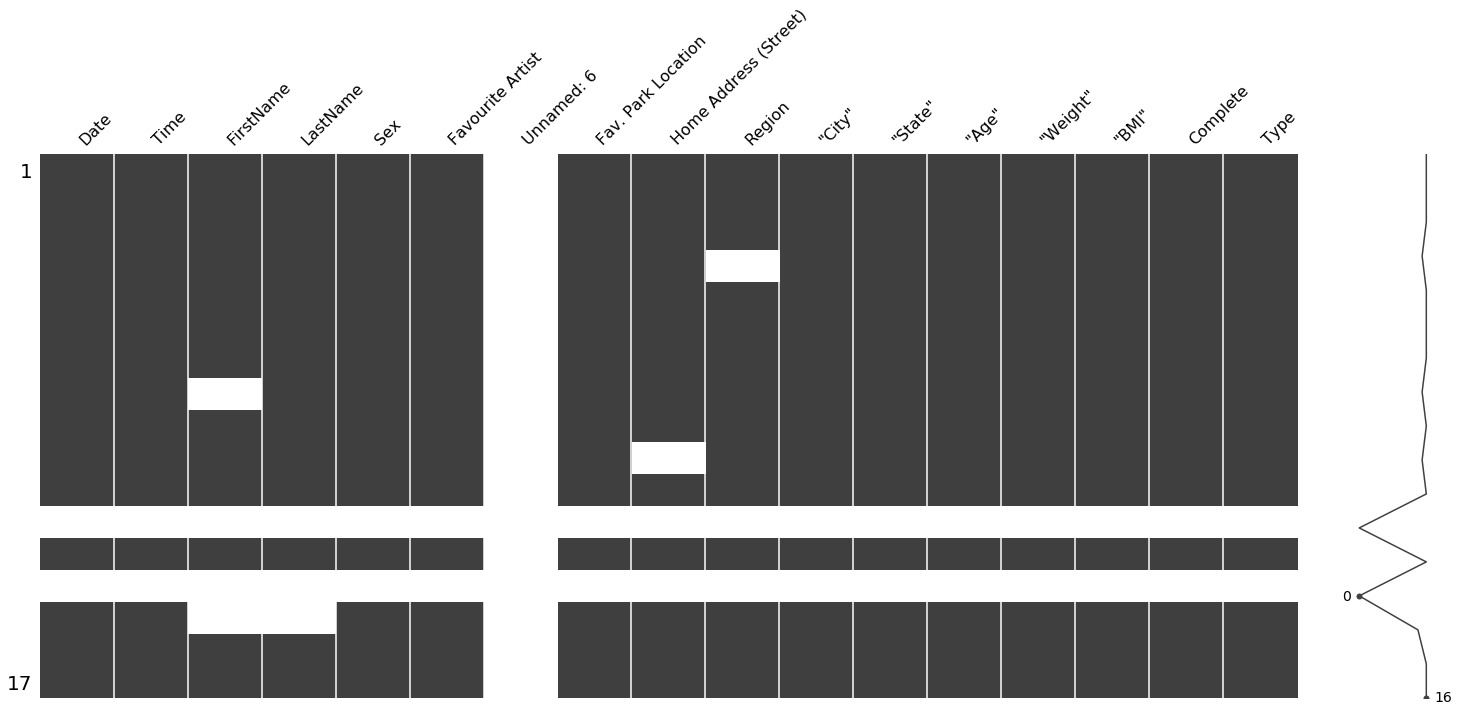

In [39]:
_=msno.matrix(df.sample(17))

In [0]:
df.dropna(how='all',axis=0,inplace=True) # rows 
df.dropna(how='all',axis=1,inplace=True) # columns

In [41]:
df.shape

(15, 16)

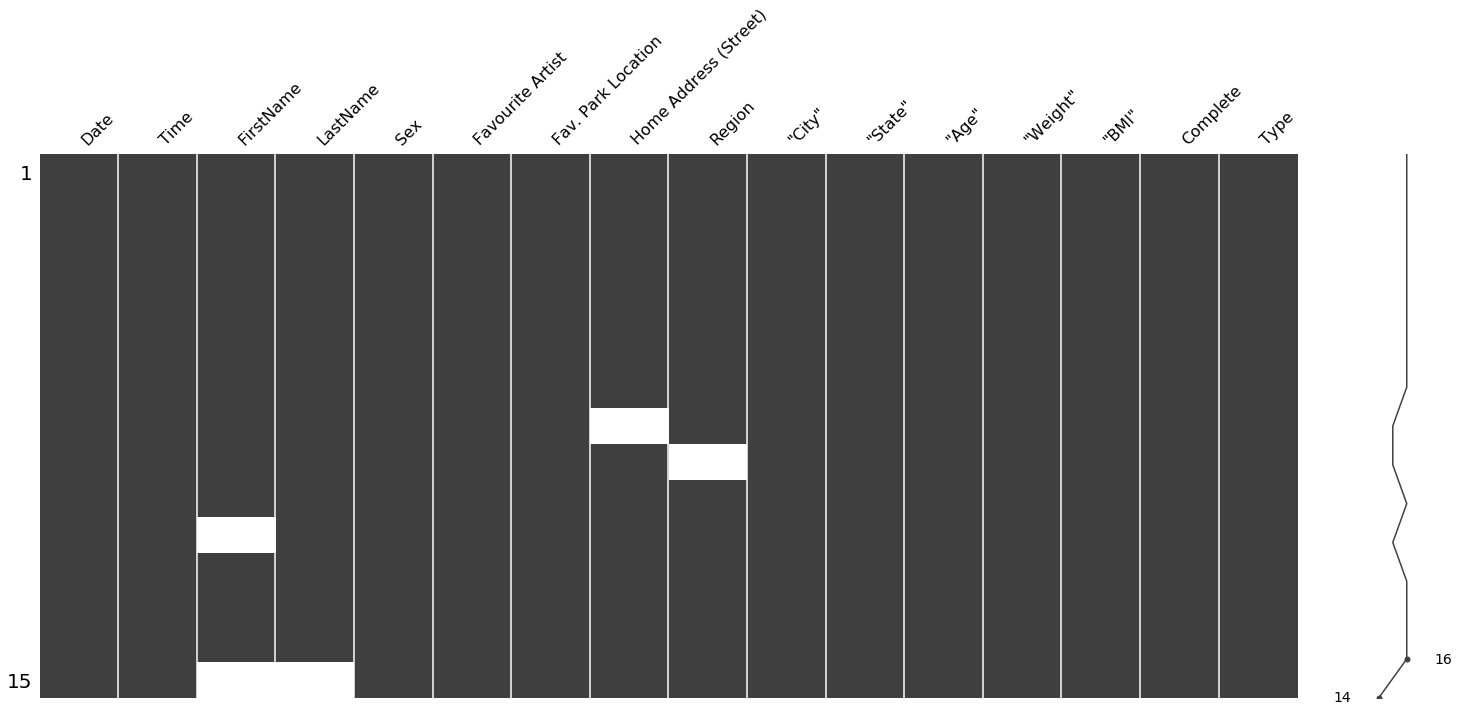

In [42]:
_=msno.matrix(df.sample(15))